In [1]:
%cd ..

/Users/crupley/gal/hoodie


In [106]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cPickle as pickle

from code.featurize import *

In [18]:
plt.rcParams['figure.figsize'] = 16, 10

<IPython.core.display.Javascript object>


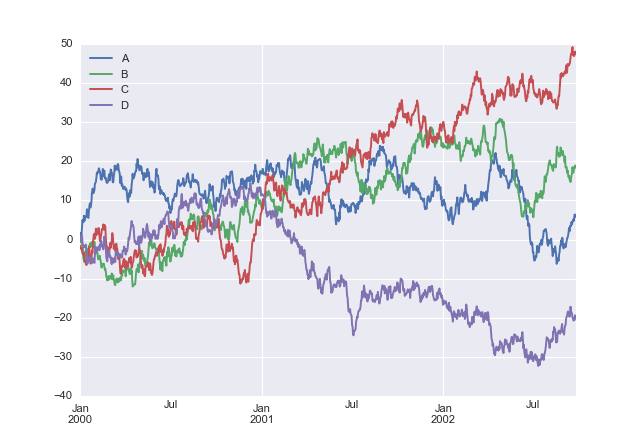

In [21]:
# interactive test
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

d = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
d = d.cumsum()
d.plot(); plt.legend(loc='best')  

In [6]:
df = pickle.load(open('features.pkl', 'rb'))
df.head()

,lat,lon,taxable_value,grocery,restaurant,retail,ncrimes,sgnf,avg_hh_size,population,walkscore
0,37.750067,-122.441075,718895.248337,-0.000153,-0.014650,0.158808,123.369982,-0.035714,1.806452,112,80.172298
1,37.750196,-122.438933,834313.797096,-0.002185,0.169033,-0.076971,105.325899,0.039474,2.375000,152,83.318625
2,37.756794,-122.436270,900225.127625,-0.012031,0.008118,0.125270,143.830470,-0.284672,1.902778,137,93.471872
3,37.753529,-122.437050,820289.998581,0.218998,0.471783,0.216543,110.432877,-0.019108,2.308824,157,91.519785
4,37.755758,-122.433400,776981.611641,-0.008045,-0.010146,0.052978,137.947900,-0.065789,2.140845,152,92.032526


<IPython.core.display.Javascript object>


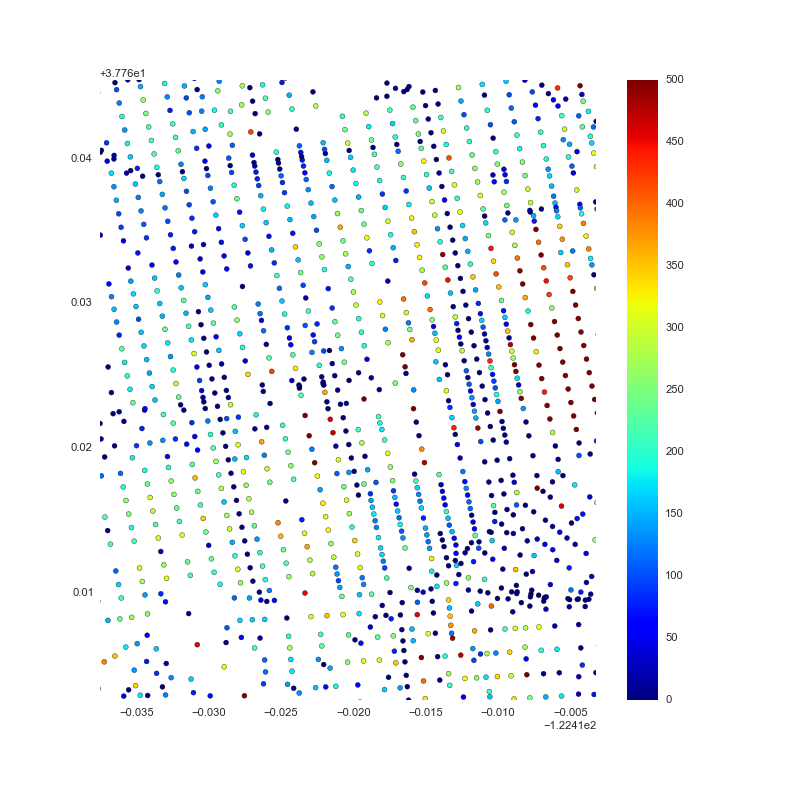

In [42]:
%matplotlib notebook
plt.figure(figsize = (10, 10))
plt.scatter(df.lon, df.lat, c=df.population, cmap='jet')
plt.axis('equal')
plt.margins(0)
plt.clim(0, 500)
plt.colorbar()
plt.show()


In [46]:
# distance grid
dist = 1e9 * np.ones((df.shape[0], df.shape[0]))
dist.shape

(7334, 7334)

In [51]:
def get_dist(df, idx1, idx2):
    dx = df.ix[idx1].lon - df.ix[idx2].lon
    dy = df.ix[idx1].lat - df.ix[idx2].lat
    return np.sqrt(dx**2 + dy**2)

get_dist(df, 1, 2)

0.0071150067336621936

In [55]:
%%time
dtest = df.iloc[:1000, :1000]

for i in dtest.index:
    for j in dtest.index:
        dist[i, j] = get_dist(dtest, i, j)

CPU times: user 8min 16s, sys: 8.03 s, total: 8min 24s
Wall time: 8min 22s


Estimated 7 hours for full completion

<matplotlib.colorbar.Colorbar instance at 0x11401e128>

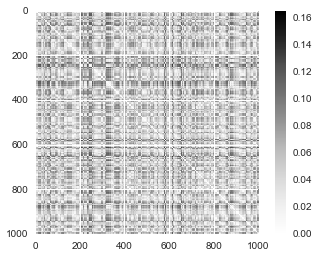

In [58]:
%matplotlib inline
plt.imshow(dist[:1000, :1000])
plt.colorbar()

In [68]:
df.loc[(df.lat < 37.7805) & 
       (df.lat > 37.78) &
       (df.lon < -122.395) &
       (df.lon > -122.425)]

,lat,lon,taxable_value,grocery,restaurant,retail,ncrimes,sgnf,avg_hh_size,population,walkscore
266,37.780407,-122.405782,115299.114559,0.955589,0.801921,5.791459,2085.008235,-0.260000,2.092105e+00,200,95.893731
2269,37.780012,-122.405274,341102.198959,0.602379,0.219778,4.360461,1710.947092,-0.186992,1.584416e+00,369,95.626862
2329,37.780125,-122.400997,54423.950314,0.402149,1.188971,0.751388,885.887753,-0.176471,2.428571e+00,17,94.470357
3093,37.780499,-122.413199,3872894.084213,0.429736,1.747986,1.534701,5521.749058,-0.213483,1.618182e+00,89,98.886894
3193,37.780492,-122.395341,699671.661327,0.018144,0.936959,0.527662,302.693883,-0.310924,2.333333e+00,238,93.961728
4221,37.780095,-122.395843,396606.669098,-0.036230,1.272421,1.530261,510.572023,-0.020408,1.531250e+00,49,94.437380
4819,37.780454,-122.421199,252458.846153,0.144359,1.184044,1.879701,830.102443,-0.049505,1.375000e+00,101,97.005465
5987,37.780150,-122.416040,860426.486389,-0.075702,1.537306,0.360929,1233.796633,-1.000000,-2.910383e-11,3,98.050476
6527,37.780249,-122.422815,557762.559631,0.580897,0.878874,-0.365756,565.771641,-0.193548,1.347826e+00,62,97.002374
6532,37.780417,-122.419431,4832906.819809,0.077216,2.312448,3.251130,849.083496,-0.047619,1.250000e+00,21,97.022980


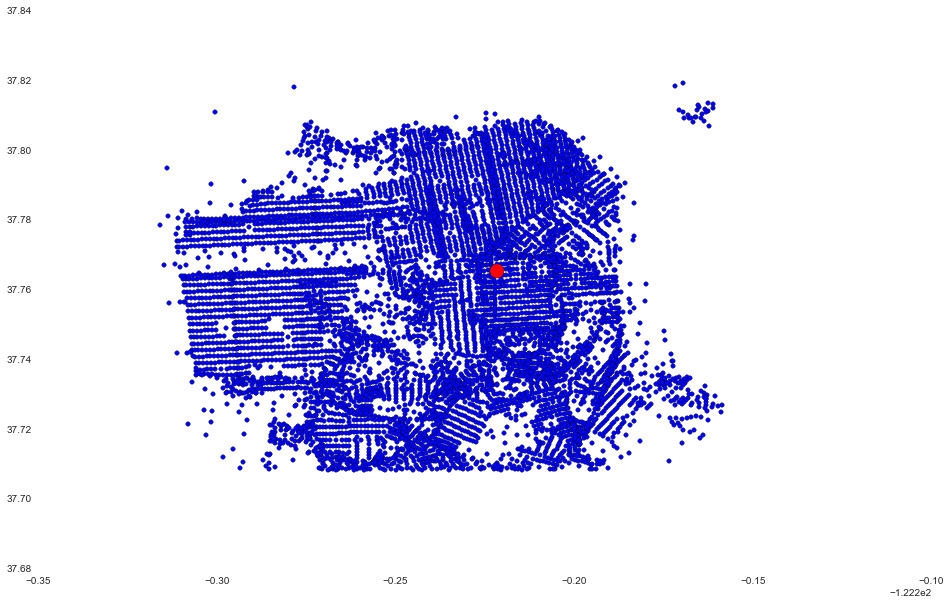

In [73]:
plt.rcParams['figure.figsize'] = 16, 10
plt.scatter(df.lon, df.lat)
plt.scatter(df.ix[105].lon, df.ix[105].lat, c='red', s=200)

In [74]:
tn = 105
testnode = df.ix[105]
testnode

lat                  37.765334
lon                -122.421672
taxable_value    770371.217598
grocery               0.926376
restaurant           10.395642
retail                7.484208
ncrimes            1763.081479
sgnf                  0.010309
avg_hh_size           4.333333
population           97.000000
walkscore            98.707194
Name: 105, dtype: float64

In [76]:
def window(df, latmin, latmax, lonmin, lonmax):
    df = df[df.lat > latmin]
    df = df[df.lat < latmax]
    df = df[df.lon > lonmin]
    df = df[df.lon < lonmax]
    return df

window(df, 37.78, 37.7805, -122.425, -122.395).head()

,lat,lon,taxable_value,grocery,restaurant,retail,ncrimes,sgnf,avg_hh_size,population,walkscore
266,37.780407,-122.405782,115299.114559,0.955589,0.801921,5.791459,2085.008235,-0.260000,2.092105,200,95.893731
2269,37.780012,-122.405274,341102.198959,0.602379,0.219778,4.360461,1710.947092,-0.186992,1.584416,369,95.626862
2329,37.780125,-122.400997,54423.950314,0.402149,1.188971,0.751388,885.887753,-0.176471,2.428571,17,94.470357
3093,37.780499,-122.413199,3872894.084213,0.429736,1.747986,1.534701,5521.749058,-0.213483,1.618182,89,98.886894
3193,37.780492,-122.395341,699671.661327,0.018144,0.936959,0.527662,302.693883,-0.310924,2.333333,238,93.961728


In [105]:
neibs = window(df, testnode.lat - 0.005,
                   testnode.lat + 0.005,
                   testnode.lon - 0.003,
                   testnode.lon + 0.003)
neibs = neibs[['lat', 'lon']]
neibs.drop(tn, axis=0, inplace=True)
neibs.shape

(62, 2)

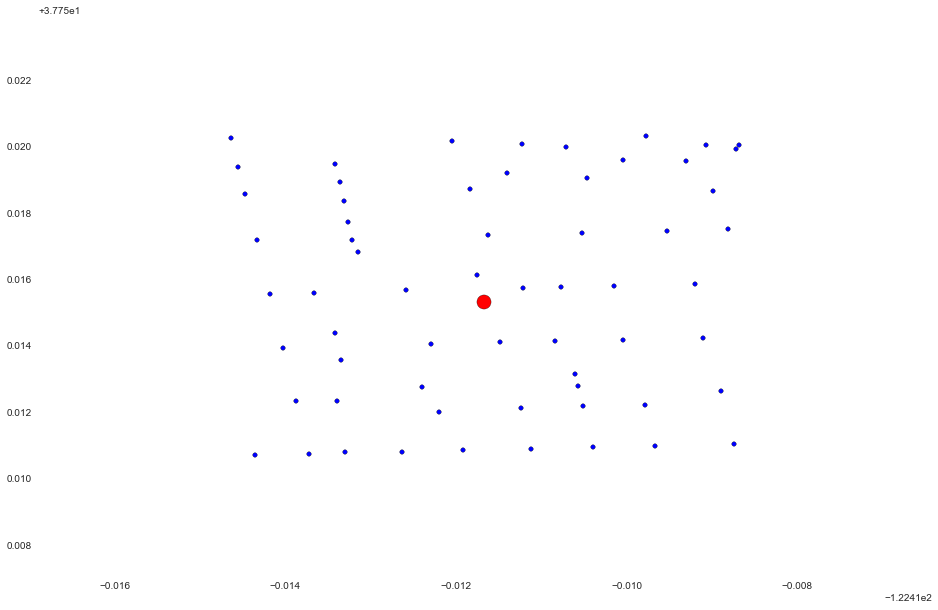

In [90]:
plt.scatter(neibs.lon, neibs.lat)
plt.scatter(testnode.lon, testnode.lat, c='red', s=200)
plt.margins(0)

In [115]:
def dist(lat1, lon1, lat2, lon2):
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    return np.sqrt(dlat**2 + dlon**2)

In [119]:
neibs['dist'] = neibs.apply(lambda x: dist(x.lat, x.lon, testnode.lat, testnode.lon), axis=1)
neibs = neibs.sort_values('dist')
neibs.head()

,lat,lon,dist
6952,37.765772,-122.421217,0.000631
173,37.766146,-122.421749,0.000816
2164,37.765692,-122.422581,0.000977
6415,37.765801,-122.420770,0.001016
6500,37.764127,-122.421486,0.001221


In [146]:
def angle(testnode, neib1, neib2):
    v1 = testnode[['lat', 'lon']] - neib1[['lat', 'lon']]
    v2 = testnode[['lat', 'lon']] - neib2[['lat', 'lon']]
    return np.arccos(v1.dot(v2) / np.linalg.norm(v1) / np.linalg.norm(v2)) * 180 / np.pi

In [145]:

v1 = testnode[['lat', 'lon']] - neibs.ix[6952][['lat', 'lon']]
v2 = testnode[['lat', 'lon']] - neibs.ix[6415][['lat', 'lon']]
np.arccos(v1.dot(v2) / np.linalg.norm(v1) / np.linalg.norm(v2)) * 180 / np.pi

16.586273215379499

In [147]:
angle(testnode, neibs.ix[6952], neibs.ix[6415])

16.586273215379499

In [186]:
neibs.ix[2164]

lat      37.765692
lon    -122.422581
dist      0.000977
Name: 2164, dtype: float64

In [189]:
closeix = [neibs.index[0]]
i = 0
while len(closeix) < 4:
    i += 1
    idx = neibs.index[i]
    angles = [angle(testnode, neibs.ix[idx], neibs.ix[j]) for j in closeix]
    if np.all(np.array(angles) > 45):
        closeix.append(idx)
closeix
    

[6952, 173, 2164, 6500]

In [174]:
i = 173
angles = [angle(testnode, neibs.ix[i], neibs.ix[j]) for j in closeix]
angles

[51.496249804555312, nan, 63.088652978313945, 176.64731862595917]

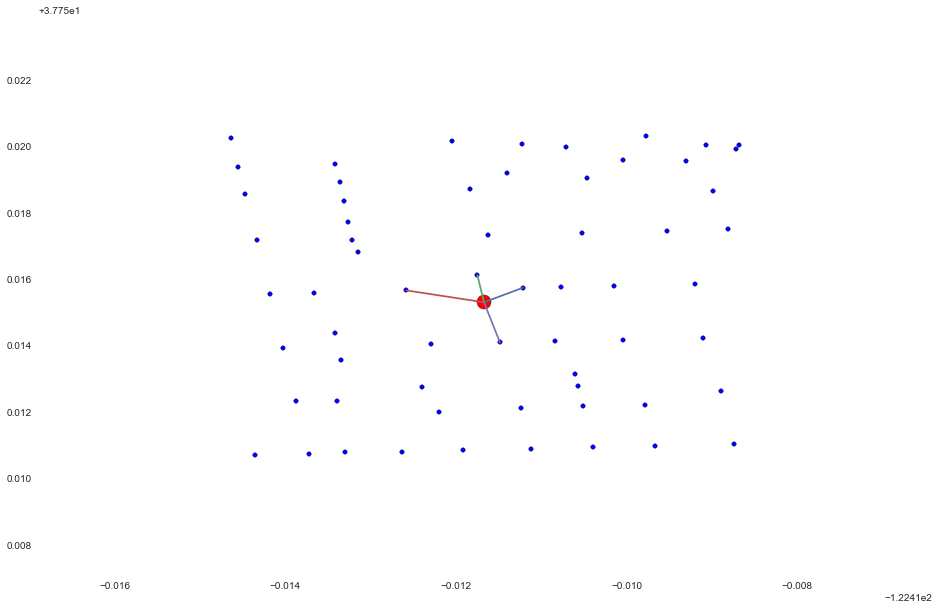

In [190]:
plt.scatter(neibs.lon, neibs.lat)
plt.scatter(testnode.lon, testnode.lat, c='red', s=200)
for neib in closeix:
    plt.plot([testnode.lon, neibs.ix[neib].lon], [testnode.lat, neibs.ix[neib].lat])

plt.margins(0)

In [8]:
from code.featurize import find_closest
from code.featurize import *

<IPython.core.display.Javascript object>


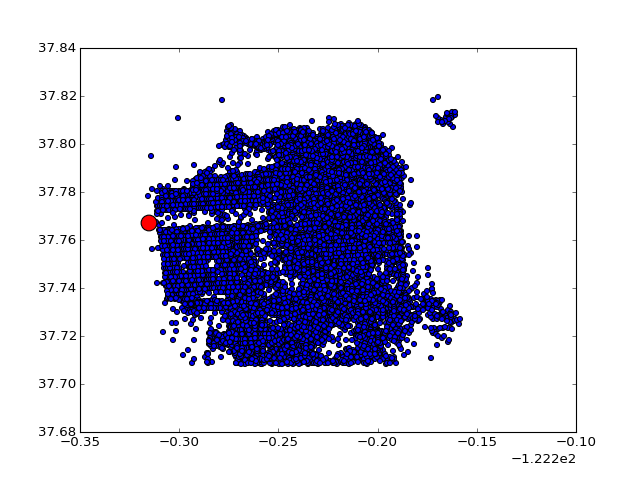

In [6]:
plt.scatter(df.lon, df.lat)
plt.scatter(df.ix[1015].lon, df.ix[1015].lat, c='red', s=200)

In [272]:
%timeit closeix = find_closest(testnode, df)

3366
3366
3366
3366
1 loops, best of 3: 260 ms per loop


In [270]:
256*7334 / 1000 / 60.

31.283333333333335

Est. 31 minutes to find all edges

2960
2960


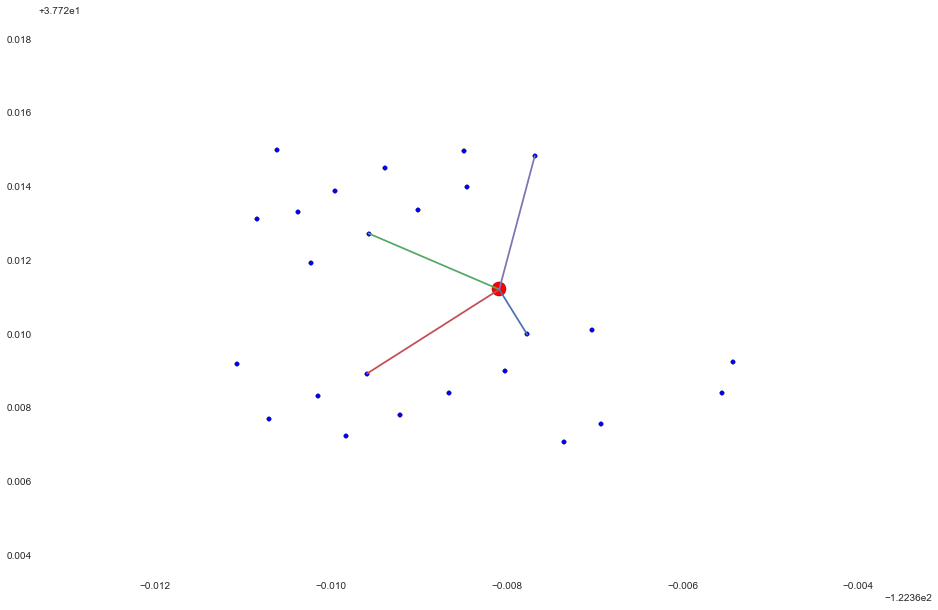

In [276]:
# view random node connections
testnode = df.ix[np.random.choice(df.index)]
print testnode.name
neibs = window(df, testnode.lat - 0.005,
                   testnode.lat + 0.005,
                   testnode.lon - 0.003,
                   testnode.lon + 0.003)
neibs = neibs[['lat', 'lon']]
neibs.drop(testnode.name, axis=0, inplace=True)

closeix = find_closest(testnode, df)
plt.scatter(neibs.lon, neibs.lat)
plt.scatter(testnode.lon, testnode.lat, c='red', s=200)
for neib in closeix:
    plt.plot([testnode.lon, neibs.ix[neib].lon], [testnode.lat, neibs.ix[neib].lat])

plt.margins(0)

Questionable nodes:
5464

In [16]:
testnode = df.ix[1015]
neibs = window(df, testnode.lat - 0.005,
                   testnode.lat + 0.005,
                   testnode.lon - 0.003,
                   testnode.lon + 0.003)
print neibs
neibs = neibs[['lat', 'lon']]
neibs.drop(testnode.name, axis=0, inplace=True)
neibs['dist'] = neibs.apply(lambda x: dist(x.lat, x.lon,
                                           testnode.lat, testnode.lon),
                            axis=1)
neibs = neibs.sort_values('dist')

neibs.head()

            lat         lon  taxable_value   grocery  restaurant    retail  \
1015  37.767179 -122.514994  672914.145264 -0.064322    1.161401 -0.393484   

         ncrimes  sgnf   avg_hh_size    population  walkscore  
1015  185.837069    -1  1.818989e-11  1.862645e-09  28.323177  


ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [10]:
len(neibs.index)

0

In [17]:
# 12:58
ll = df[['lat', 'lon']]
ll.head()
ll['neighbors'] = ll.apply(lambda x: find_closest(x, df), axis = 1)
pickle.dump(ll, open('neighbors.pkl', 'wb'))

/Users/crupley/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
n = pickle.load(open('neighbors.pkl', 'rb'))
n.head()

,lat,lon,neighbors
0,37.750067,-122.441075,"[1086, 4952, 4067, 2729]"
1,37.750196,-122.438933,"[4952, 598, 4446, 4448]"
2,37.756794,-122.436270,"[4561, 4953, 1152, 5127]"
3,37.753529,-122.437050,"[181, 599, 4562, 4447]"
4,37.755758,-122.433400,"[1088, 5, 1526, 1087]"


In [20]:
n['length'] = n.neighbors.apply(len)
n.head()

,lat,lon,neighbors,length
0,37.750067,-122.441075,"[1086, 4952, 4067, 2729]",4
1,37.750196,-122.438933,"[4952, 598, 4446, 4448]",4
2,37.756794,-122.436270,"[4561, 4953, 1152, 5127]",4
3,37.753529,-122.437050,"[181, 599, 4562, 4447]",4
4,37.755758,-122.433400,"[1088, 5, 1526, 1087]",4


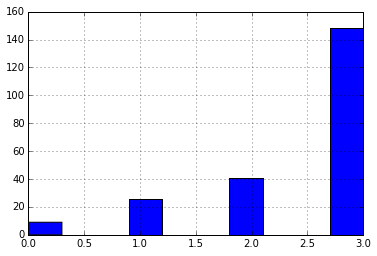

In [23]:
%matplotlib inline
n.length[n.length != 4].hist()

In [29]:
n.length.value_counts()

4    7110
3     148
2      41
1      26
0       9
Name: length, dtype: int64

In [24]:
n.length[n.length == 0]

1015    0
1496    0
2401    0
2992    0
3405    0
3515    0
3925    0
4226    0
4784    0
Name: length, dtype: int64

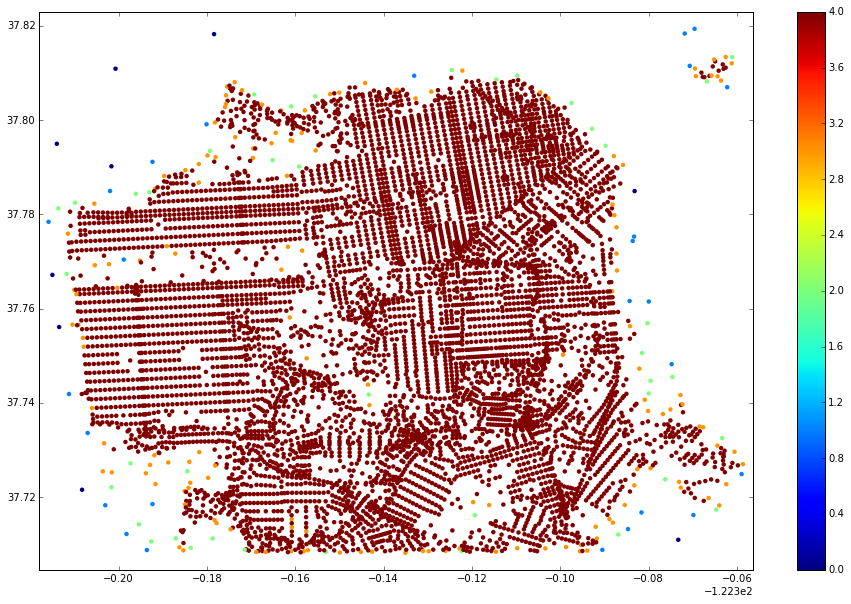

In [28]:
plt.figure(figsize = (16, 10))
plt.scatter(n.lon, n.lat, c=n.length, linewidth=0)
plt.colorbar()
plt.margins(0)

# Plotting many line segments

http://stackoverflow.com/questions/21352580/matplotlib-plotting-numerous-disconnected-line-segments-with-different-colors

```
N = 60000
_s = np.random.rand(N) #x1
_t = np.random.rand(N) #x2
_u = np.random.rand(N) #y1
_v = np.random.rand(N) #y2
x = []
y = []
for s, t, u, v in zip(_s, _t, _u, _v):
    x.append(s)
    x.append(u)
    x.append(None)
    y.append(t)
    y.append(v)
    y.append(None)
plt.plot(x, y)
```

* overflow error

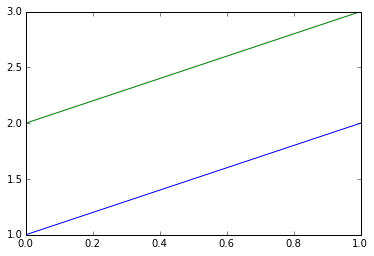

In [11]:
a = [(1,2), (2,3)]
plt.plot(a)

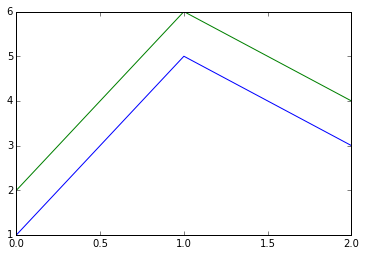

In [14]:
a = [(1,2), (5, 6), (3,4)]
plt.plot(a)

In [ ]:
# view random node connections
testnode = df.ix[np.random.choice(df.index)]
print testnode.name
neibs = window(df, testnode.lat - 0.005,
                   testnode.lat + 0.005,
                   testnode.lon - 0.003,
                   testnode.lon + 0.003)
neibs = neibs[['lat', 'lon']]
neibs.drop(testnode.name, axis=0, inplace=True)

closeix = find_closest(testnode, df)
plt.scatter(neibs.lon, neibs.lat)
plt.scatter(testnode.lon, testnode.lat, c='red', s=200)

CPU times: user 207 ms, sys: 12.9 ms, total: 220 ms
Wall time: 211 ms


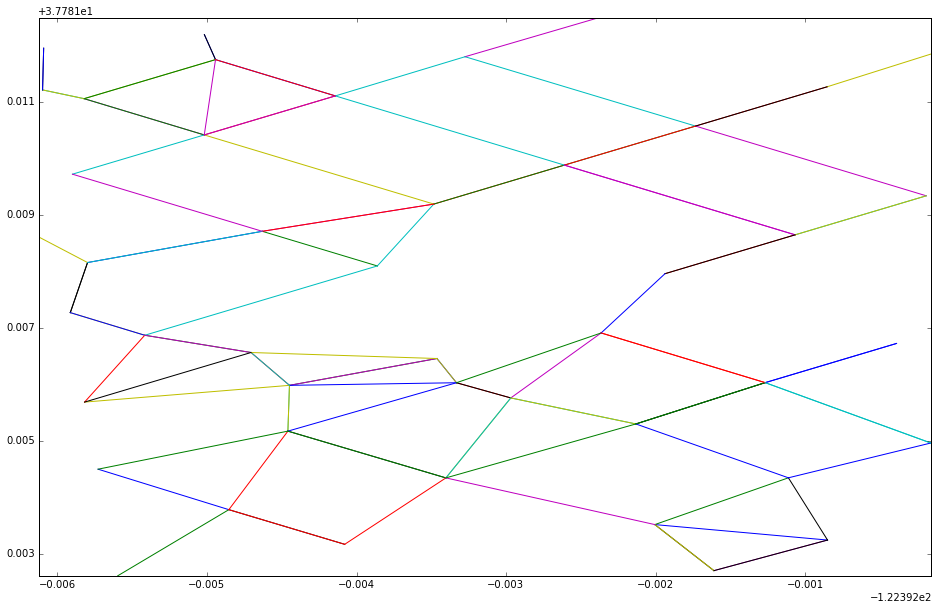

In [58]:
%%time
for idx in np.append(testnode.name, neibs.index):
    testnode = n.ix[idx]

    for neib in testnode.neighbors:
        if neib not in neibs.index: break
        plt.plot([testnode.lon, neibs.ix[neib].lon], [testnode.lat, neibs.ix[neib].lat])

plt.margins(0)

In [22]:
print neibs.shape
print n.ix[neibs.index].shape

(85, 2)
(85, 3)


In [60]:
# est time to render plot
7334/85. * 220 / 1000

18.98211764705882

CPU times: user 51.4 s, sys: 742 ms, total: 52.1 s
Wall time: 52.1 s


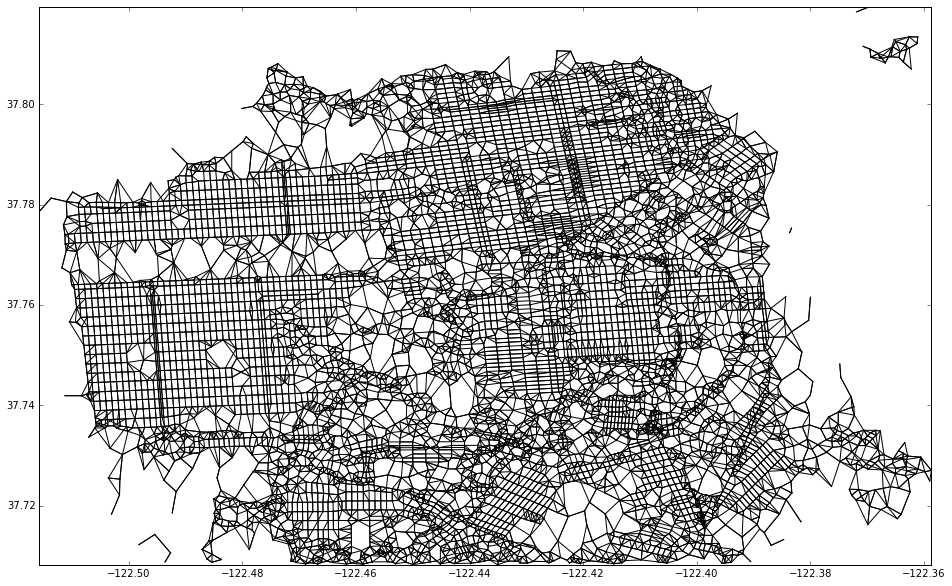

In [69]:
%%time

cidx = []
for idx in df.index:
    cidx.append(idx)
    testnode = n.ix[idx]

    for neib in testnode.neighbors:
        plt.plot([testnode.lon, df.ix[neib].lon], [testnode.lat, df.ix[neib].lat], c='black')

ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.axis('equal')
plt.margins(0)

# make edge list

In [133]:
%%time
edges = pd.DataFrame(columns=['node1', 'node2'])

for node1 in n.index:
    for node2 in n.ix[node1].neighbors:
        newrow = {'node1':node1, 'node2':node2}
        edges = edges.append(newrow, ignore_index=True)
        
print edges.shape
edges.head()

(28992, 2)
CPU times: user 1min 12s, sys: 875 ms, total: 1min 13s
Wall time: 1min 14s


In [134]:
edges.head()

,node1,node2
0,0,1086
1,0,4952
2,0,4067
3,0,2729
4,1,4952


In [135]:
edges = edges.astype('int')

In [143]:
pickle.dump(edges, open('edges.pkl', 'wb'))

In [144]:
loadededges = pickle.load(open('edges.pkl', 'rb'))

In [145]:
print loadededges.shape
loadededges.head()

(28992, 3)


,node1,node2,dist
0,0,1086,0.001064
1,0,4952,0.001074
2,0,4067,0.001337
3,0,2729,0.001620
4,1,4952,0.001072


In [105]:
lat, lon = df.ix[100][['lat', 'lon']]
print lat, lon

37.7515996 -122.4635523


In [116]:
dist_by_node(0, 1086, df)

0.0010636334424945597

In [114]:
df.ix[0]

lat                  37.750067
lon                -122.441075
taxable_value    718895.248337
grocery              -0.000153
restaurant           -0.014650
retail                0.158808
ncrimes             123.369982
sgnf                 -0.035714
avg_hh_size           1.806452
population          112.000000
walkscore            80.172298
Name: 0, dtype: float64

In [127]:
edges.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28992 entries, 0 to 28991
Data columns (total 2 columns):
node1    28992 non-null float64
node2    28992 non-null float64
dtypes: float64(2)
memory usage: 679.5 KB


In [122]:
for idx in edges.index[:10]:
    edge = edges.ix[idx]
    print edge
    dist_by_node(edge.node1, edge.node2, df)

node1       0
node2    1086
Name: 0, dtype: float64


KeyError: 0.0

In [141]:
edges['dist'] = edges.apply(lambda x: dist_by_node(x.node1, x.node2, df), axis = 1)

In [142]:
edges.head()

,node1,node2,dist
0,0,1086,0.001064
1,0,4952,0.001074
2,0,4067,0.001337
3,0,2729,0.001620
4,1,4952,0.001072


In [119]:
edges.iloc[:10,:].apply(lambda x: x.node1 + x.node2, axis = 1)

0    1086
1    4952
2    4067
3    2729
4    4953
5     599
6    4447
7    4449
8    4563
9    4955
dtype: float64

True